<center><h2> CPE 4040 Spring 2023: Homework 5</h2></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or AI's) codes.__

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.
 * Deadline: 11:59 pm, 3/22 (Wednesday)

In [126]:
import pandas as pd
import numpy as np

In [127]:
import matplotlib.pyplot as plt

<h2>Q1: DataFrame indexing and slicing (25 Points)</h2>

<h3>1. Create a DataFrame with the same row indices, column labels, and data as the table below.</h3>

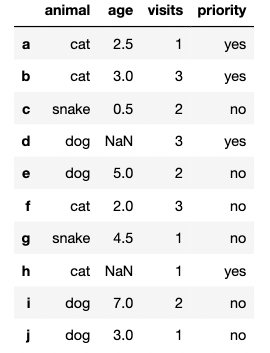

In [128]:
animalData = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'], 
        'age': [2.5, 3, 0.5, 6, 5, 2, 4.5, 4, 7, 3], 
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1], 
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = list('abcdefghij')
df = pd.DataFrame(animalData, index=labels)

df.loc['d', 'age'] = np.NaN
df.loc['h','age'] = np.NaN

#Creation of the dataframe via a dictionary
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>2. Select only the 'animal' and 'visits' columns from the DataFrame and show the result.</h3>

In [129]:
df[['animal', 'visits']] #Extracts the first two columns and displays them

,animal,visits
a,cat,1
b,cat,3
c,snake,2
d,dog,3
e,dog,2
f,cat,3
g,snake,1
h,cat,1
i,dog,2
j,dog,1


<h3>3. Select the data in rows 'c', 'f', and 'g' and in columns 'animal' and 'age'. Show the result.</h3>

In [130]:
df.loc[['c', 'f', 'g'], ['animal', 'age']] #Gets the chosen rows and columns and displays them

,animal,age
c,snake,0.5
f,cat,2.0
g,snake,4.5


<h3>4. Select the rows where the animal is a dog and the age is less than 5.</h3>

In [131]:
df.loc[['j']] #Row J is the only row in the group of dogs that is less than 5

,animal,age,visits,priority
j,dog,3.0,1,no


<h3>5. In the 'animal' column, change the 'snake' entries to 'python'</h3>

In [132]:
df['animal'] = df['animal'].replace(['snake'], 'python') #Changes all the snake entires under "animal" into python

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>6. Select the rows where the age is missing, i.e. age value is NaN.</h3>

In [133]:
df.loc[['d','h']] #Selects the rows that have NaN

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


<h3>7. We want to clean up the NaN by replacing it with the average age of the dogs (or cats).</h3>
<h3>First, please find out the average age of the dogs and the average age of the cats.</h3>

In [134]:
averageDogs = df[df['animal'] == 'dog']['age'].mean() #Finds the mean of the ages of dogs using boolean arrays
averageCats = df[df['animal'] == 'cat']['age'].mean() #Finds the mean of the ages of cats using boolean arrays

#Prints the averages
print('Average age of dogs:',averageDogs)
print('Average age of cats:',averageCats)

Average age of dogs: 5.0
Average age of cats: 2.5


<h3>8. Replace the NaNs with the average ages and show the resulting DataFrame</h3>

In [135]:
df.loc['d','age'] = averageDogs #Replaces NaN with the average age of dogs
df.loc['h','age'] = averageCats#Replaces NaN with the average age of cats

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,5.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,2.5,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h2>Q2: DataFrame Arithmetics (15 Points)</h2>
    
<h3> 1. Generate a DataFrame that has 10 rows and 8 columns of random numbers (use np.random.rand). </h3>
<h3>Label the columns A, B, C, D, E, F, G and H.</h3>

In [136]:
randomNumbers = np.random.rand(10,8) #Makes a random 10x8 array

#Creates the dataframe and labels the columns
df = pd.DataFrame(randomNumbers, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']) 

df

,A,B,C,D,E,F,G,H
0,0.973047,0.074033,0.393517,0.986986,0.541450,0.821210,0.860246,0.066452
1,0.084977,0.859285,0.368931,0.419851,0.229826,0.294636,0.282647,0.047793
2,0.376019,0.098667,0.613975,0.019269,0.327366,0.453800,0.989489,0.917733
3,0.320463,0.822778,0.358392,0.983956,0.159951,0.455387,0.557962,0.719360
4,0.008119,0.521563,0.053850,0.155396,0.676724,0.568199,0.078929,0.136673
5,0.360228,0.158553,0.083234,0.518625,0.310509,0.972671,0.802647,0.109386
6,0.018530,0.843135,0.195931,0.996738,0.224837,0.390185,0.230070,0.316657
7,0.423658,0.919579,0.907987,0.291478,0.457655,0.295951,0.734193,0.665095
8,0.253736,0.492379,0.778864,0.346792,0.106568,0.017948,0.132364,0.711627
9,0.735856,0.589087,0.368135,0.846196,0.130577,0.697833,0.603989,0.359098


<h3>2. Calculate the sum of numbers for each column. Display the result.</h3>

In [137]:
sumOfColumns = df.sum(axis=0) #Sums all the valunes in the columns noted by axis=0

print(sumOfColumns)

A    3.554634
B    5.379060
C    4.122815
D    5.565286
E    3.165461
F    4.967820
G    5.272536
H    4.049875
dtype: float64


<h3>3. Which column has the smallest sum? Please answer with the column label.</h3>

In [138]:
minLabel = df.sum().idxmin() #Gives the index letter of the smallest mean displayed above.

print(minLabel)

E


<h3>4. Calculate the mean value for each row, then subtract the mean from each element in the row.</h3>

In [139]:
meansOfRows = df.mean(axis=1) #Will find the mean value of each row

#With the use of lambda, we can apply this function to the find the value of orignalValue - meansOfRows
dfMeanMinusOrigin = df.apply(lambda x: x - x.mean(), axis=1) 

dfMeanMinusOrigin

,A,B,C,D,E,F,G,H
0,0.383430,-0.515584,-0.196101,0.397368,-0.048168,0.231592,0.270629,-0.523166
1,-0.238516,0.535792,0.045438,0.096358,-0.093667,-0.028857,-0.040847,-0.275700
2,-0.098520,-0.375873,0.139436,-0.455271,-0.147174,-0.020740,0.514949,0.443193
3,-0.226818,0.275497,-0.188889,0.436675,-0.387331,-0.091894,0.010681,0.172079
4,-0.266812,0.246631,-0.221082,-0.119536,0.401792,0.293267,-0.196003,-0.138259
5,-0.054254,-0.255928,-0.331247,0.104143,-0.103973,0.558190,0.388166,-0.305096
6,-0.383480,0.441125,-0.206080,0.594728,-0.177173,-0.011826,-0.171941,-0.085353
7,-0.163291,0.332630,0.321037,-0.295472,-0.129295,-0.290998,0.147243,0.078145
8,-0.101299,0.137345,0.423829,-0.008242,-0.248467,-0.337087,-0.222671,0.356593
9,0.194510,0.047740,-0.173212,0.304850,-0.410769,0.156487,0.062643,-0.182248


<h3>5. Add an additional row with the mean value of each column. Label this new row "Average".</h3>

In [140]:
df.loc['Average'] = df.mean(axis=0) #Average is created and displayed with the average means across each column

df

,A,B,C,D,E,F,G,H
0,0.973047,0.074033,0.393517,0.986986,0.541450,0.821210,0.860246,0.066452
1,0.084977,0.859285,0.368931,0.419851,0.229826,0.294636,0.282647,0.047793
2,0.376019,0.098667,0.613975,0.019269,0.327366,0.453800,0.989489,0.917733
3,0.320463,0.822778,0.358392,0.983956,0.159951,0.455387,0.557962,0.719360
4,0.008119,0.521563,0.053850,0.155396,0.676724,0.568199,0.078929,0.136673
5,0.360228,0.158553,0.083234,0.518625,0.310509,0.972671,0.802647,0.109386
6,0.018530,0.843135,0.195931,0.996738,0.224837,0.390185,0.230070,0.316657
7,0.423658,0.919579,0.907987,0.291478,0.457655,0.295951,0.734193,0.665095
8,0.253736,0.492379,0.778864,0.346792,0.106568,0.017948,0.132364,0.711627
9,0.735856,0.589087,0.368135,0.846196,0.130577,0.697833,0.603989,0.359098


<h2> Q3: Stock Market Daily Changes (60 Points)</h2>

__As discussed in class, the percentage daily change of the stock market index, tracked over a long period of time, can be modeled as a random process with normal distribution. In this exercise, you will download real market data of a particular stock (or an index, such as Dow Jones or S&P500) and find out if that is the case.__

__You will follow the step-by-step guide in the other Jupyter Notebook file, Homework 5 - Historical Stock data, to perform some data analysis and plot a couple of charts, for the stock of your own choice.__

__Please review the Jupyter Notebook first and perform your work here.__

## Step 1: Read the stock historical data 

In [141]:
#Reads the CSV of the GME Stock (GME = GameStop)
df = pd.read_csv(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4040\HW5\HistoricalData_GME.csv')

<h2>Step 2: df.info( ): details of the DataFrame - shape, row index, column labels, dtypes</h2>

In [142]:
#Displays the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


## Step 3: Display the first 5 rows of the dataframe

In [143]:
#Displays first 5 rows
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/21/2023,$17.65,15882850,$17.15,$18.35,$17.14
1,03/20/2023,$16.87,4463676,$16.65,$17.27,$16.25
2,03/17/2023,$16.60,5105501,$16.62,$16.72,$15.9193
3,03/16/2023,$16.76,4093282,$16.00,$16.7689,$15.53
4,03/15/2023,$15.95,4541529,$16.50,$16.69,$15.695


## Step 4: Data cleaning before data analysis

<h3>Step 4.1: Remove the dollar signs in the price columns and convert them to float</h3>

In [144]:
#This is used to removed the $s in the numbers given so we can process them better through out the analysis.
df['Open'].str.strip("$")
col = ['Close/Last', 'Open', 'High', 'Low']

for c in col:
    df[c] = df[c].str.strip('$')

df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/21/2023,17.65,15882850,17.15,18.35,17.14
1,03/20/2023,16.87,4463676,16.65,17.27,16.25
2,03/17/2023,16.60,5105501,16.62,16.72,15.9193
3,03/16/2023,16.76,4093282,16.00,16.7689,15.53
4,03/15/2023,15.95,4541529,16.50,16.69,15.695


In [145]:
#Changes all the columns into floating numbers so we can interact with them
df[col] = df[col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   int64  
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


### Step 4.2: The Date column needs to be converted to datetime format first

In [146]:
#Changes the date into datetime format.
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


## Step 5: Examine the column data statistics using df.describe()

In [147]:
#Displays the stats of the current data
df.describe()

,Close/Last,Volume,Open,High,Low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,12.471571,1.878430e+07,12.506908,13.011437,12.017283
std,13.597049,4.142984e+07,13.724723,14.629464,12.851652
min,0.700000,1.122700e+06,0.712500,0.735000,0.642500
25%,3.805000,7.156744e+06,3.797500,3.865000,3.720000
50%,7.807500,1.047370e+07,7.765000,7.925000,7.641300
75%,12.062500,1.691095e+07,12.075000,12.285000,11.837500
max,86.877500,7.886316e+08,94.927500,120.750000,72.877500


### Find the largest trading volume

In [148]:
#Though typing, we make df1 take the statics of the data that we found above.
df1 = df.describe()
type(df1)

pandas.core.frame.DataFrame

In [149]:
#Displays the largest trading volume on the 'max' row under the 'Volume'column
df1.loc['max', 'Volume']

788631600.0

### Find the all-time high in closing price

In [150]:
#Displays the all time high in closing price on the 'max' row under the 'Close/Last'column
df1.loc['max', 'Close/Last']

86.8775

### Which date(s) did the all-time high in closing price occur? 

In [151]:
#Will sort the data and displays the top 5 dates in highest closing price al ltime.
df.sort_values('Close/Last', ascending=False).head()

,Date,Close/Last,Volume,Open,High,Low
540,2021-01-27,86.8775,373586680,88.7075,95.000,62.2500
538,2021-01-29,81.2500,202264240,94.9275,103.495,62.5000
448,2021-06-09,75.6400,53717240,75.7800,82.000,72.8775
449,2021-06-08,75.0000,69756480,73.0000,86.165,70.2500
453,2021-06-02,70.5600,64076880,62.2200,73.500,61.0750


## Step 6: Plot the historical performance chart 

### 10-Year Historical Price Plot

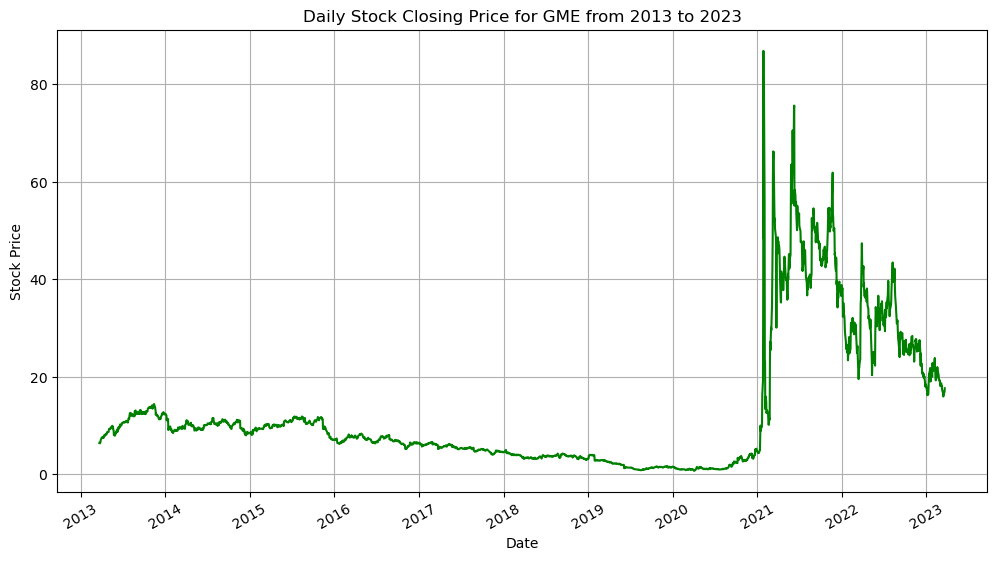

In [152]:
"""
Displays the historical price plot. The price plot shows the reason why I chose this stock in particular as I was part
of this historical moment in history. The GME Short Squeeze in January 2021 deserves to be known as one of the biggest
events to happen in a long time in the Stock Market's history, and it was needed to be sheaded a light upon it given the
spectacle of the whole situation.

"""
plt.figure(figsize=(12,6))

plt.plot(df.Date, df['Close/Last'], 'g', label='Stock Price')

plt.xticks(rotation=30)
plt.ylabel('Stock Price')
plt.xlabel('Date')

plt.title('Daily Stock Closing Price for GME from 2013 to 2023')  
plt.grid()
plt.show()

## Step 7: Data Analysis: the statistical distribution of the daily price change

In [153]:
#Adds Change% and Price Change
df['Price Change'] = df['Close/Last'] - df['Open']
df['Change %'] = df['Price Change']/df['Open']*100

df.head()

,Date,Close/Last,Volume,Open,High,Low,Price Change,Change %
0,2023-03-21,17.65,15882850,17.15,18.3500,17.1400,0.50,2.915452
1,2023-03-20,16.87,4463676,16.65,17.2700,16.2500,0.22,1.321321
2,2023-03-17,16.60,5105501,16.62,16.7200,15.9193,-0.02,-0.120337
3,2023-03-16,16.76,4093282,16.00,16.7689,15.5300,0.76,4.750000
4,2023-03-15,15.95,4541529,16.50,16.6900,15.6950,-0.55,-3.333333


### Find out the mean and standard deviation of "Change %"

In [154]:
#Finds the mean and Standard Devation of 'Change %'
dfMean = df["Change %"].mean()
dfStd = df["Change %"].std()

print (dfMean, dfStd)

0.08934813535734139 5.272413005391755


### Plot a histogram to observe the "Change %" distribution

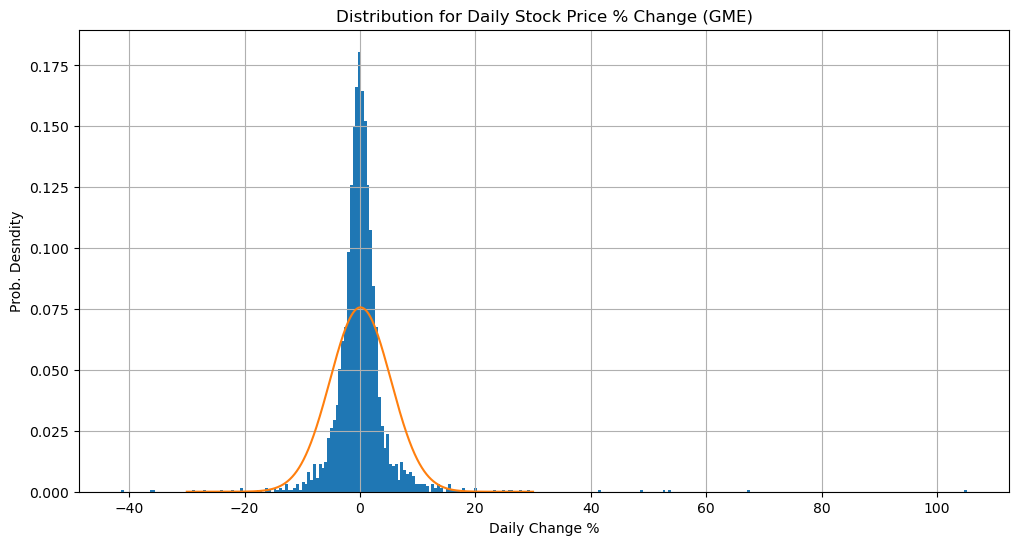

In [156]:
"""
Plots the histogram of Change %. As seen here, the reason it is so skewed is due to the heavy outliners shown due to the
short squeeze. The company before 2021 was averaging around $1 - $1.50 per stock and climbed to 100 times more than that
during the Short Squeeze that has occured.
"""
plt.figure(figsize=(12,6))
plt.hist(df["Change %"], 300, density=True)
plt.title('Distribution for Daily Stock Price % Change (GME)')


plt.ylabel('Prob. Desndity')
plt.xlabel('Daily Change %')
plt.grid(True, which='both')



from scipy.stats import norm
x_axis = np.arange(-30, 30, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, df_mean, df_std))
plt.show()